[View in Colaboratory](https://colab.research.google.com/github/KazuyukiIgarashi/Report/blob/master/MachineLearning_Report.ipynb)

iteration number is 10
batch steepest gradient method
J = [69.455216]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


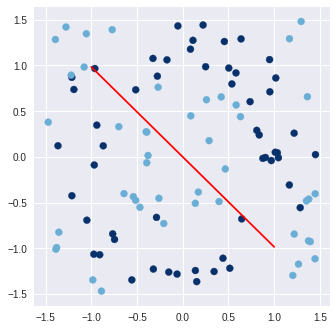

In [81]:
#@title Problem1-1 Data1 { form-width: "20%" }
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 3 * (np.random.rand(n,2) - 0.5)
radius = np.power(x[:,0],2) + np.power(x[:,1],2)
y = (radius > 0.7 + 0.1*np.random.normal(0,1,(1,n))) & (radius < 2.2 + 0.1*np.random.normal(0,1,(1,n)))
y = 2 * y.T - 1
#print(x)
#print(y[:,0])

plt.scatter(x[:,0],x[:,1],c=y[:,0],cmap='Blues',vmin=-3,vmax=1)


W = [1,1]
iteration = 10
rate = 0.01

OutJS = np.zeros(iteration)
OutJN = np.zeros(iteration)
print("iteration number is",iteration)

for k in range(iteration):
  J = 0
  for i in range(n):
    J += np.log(1 + np.exp(-y[i]*np.dot(W,x[i,:])))
  for i in range(n):
    W += (rate*np.exp(-y[i]*np.dot(W,x[i,:]))/(1 + np.exp(-y[i]*np.dot(W,x[i,:])))) * y[i] * x[i,:]    
  OutJS[k] = J
print("batch steepest gradient method")
print("J =",J)

borderXS = np.linspace(-1.0,1.0,4)
borderYS = (-W[0]/W[1])*borderXS 
plt.plot(borderXS,borderYS,"r-")
'''
for k in range(iteration):
  J = 0
  gradient = [0,0]
  for i in range(n):
    J += np.log(1 + np.exp(-y[i]*np.dot(W,x[i,:])))
  for i in range(n):
    gradient += (np.exp(-y[i]*np.dot(W,x[i,:]))/(1 + np.exp(-y[i]*np.dot(W,x[i,:])))) * y[i] * x[i,:]    
  print(gradient)
  W += J/gradient
  print(W)
  OutJN[k] = J

print("Newton based method")
print("J =",J)

borderXN = np.linspace(-1.0,1.0,4)
borderYN = (-W[0]/W[1])*borderXN
plt.plot(borderXN,borderYN,"b-")
'''
plt.axes().set_aspect('equal')

J = 17.434059810144714
iteration number is 50


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


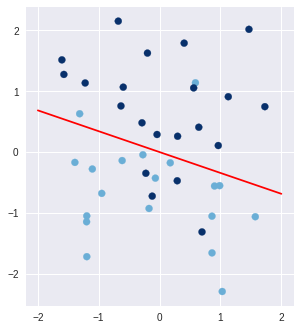

In [78]:
#@title Problem1-1 Data2 { form-width: "20%" }
import numpy as np
import matplotlib.pyplot as plt

n = 40
omega = np.random.normal()
noise = 0.8*np.random.normal(0,1,(n,1)).T

x = np.random.normal(0,1,(n,2))
y = 2 * ( omega * x[:,0] + x[:,1] + noise > 0 ) - 1

#print(x)
#print(y)

plt.scatter(x[:,0],x[:,1],c=y[0,:],cmap='Blues',vmin=-3,vmax=1)


W = [1,1]
iteration = 50
rate = 0.1
OutJS = np.zeros(iteration)

for k in range(iteration):
  J = 0
  for i in range(n):
    J += np.log(1.0 + np.exp(-y[0,i]*np.dot(W,x[i,:])))    
  OutJS[k] = J   
  for i in range(n):
    W += (rate*np.exp(-y[0,i]*np.dot(W,x[i,:]))/(1 + np.exp(-y[0,i]*np.dot(W,x[i,:])))) * y[0,i] * x[i,:]     
 
print("J =",J)
print("iteration number is",iteration)

borderX = np.linspace(-2.0,2.0,4)
borderY = (-W[0]/W[1])*borderX
plt.plot(borderX,borderY,"r-")
plt.axes().set_aspect('equal')

In [0]:
#@title Problem1-1 Data2 lamda　failure  { form-width: "20%" }
import numpy as np
import matplotlib.pyplot as plt

n = 40
omega = np.random.normal()
noise = 0.8*np.random.normal(0,1,(n,1)).T

x = np.random.normal(0,1,(n,2))
y = 2 * ( omega * x[:,0] + x[:,1] + noise > 0 ) - 1

#print(x)
#print(y)

plt.scatter(x[:,0],x[:,1],c=y[0,:],cmap='Blues',vmin=-3,vmax=1)


W = [1,1]
lamda = 0.0
iteration = 10
rate = 0.1
OutJS = np.zeros(iteration)

for k in range(iteration):
  J = lamda*np.dot(W,W)
  for i in range(n):
    J += np.log(1.0 + np.exp(-y[0,i]*np.dot(W,x[i,:])))    
  OutJS[k] = J   
  lamda += -rate*np.dot(W,W)
  W += (-2.0*rate*(lamda+rate*np.dot(W,W))) * np.array(W)
  print(W)
  print(lamda)
  for i in range(n):
    W += (rate*np.exp(-y[0,i]*np.dot(W,x[i,:]))/(1 + np.exp(-y[0,i]*np.dot(W,x[i,:])))) * y[0,i] * x[i,:]     
 
print("J =",J)
print("iteration number is",iteration)

borderX = np.linspace(-2.0,2.0,4)
borderY = (-W[0]/W[1])*borderX -lamda/W[1]
plt.plot(borderX,borderY,"r-")
plt.axes().set_aspect('equal')

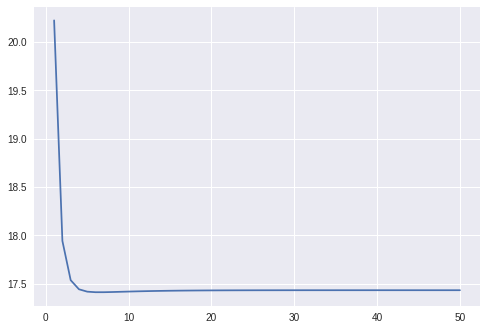

In [79]:
#@title J { form-width: "20%" }
import numpy as np
import matplotlib.pyplot as plt

NoI = np.linspace(1,iteration,iteration)
#print(OutJS)
#print(NoI)
plt.plot(NoI,OutJS)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def proximal_gradient(grad_f, prox, gamma, objective, init_x, tol = 1e-9):
    x = init_x
    result = objective(x)
    while 1:
        x_new = prox(x - gamma * grad_f(x), gamma)
        result_new = objective(x_new)
        if (np.abs(result - result_new)/np.abs(result) < tol) == True :
            break;
        x = x_new
        result = result_new
    return x_new, result_new
  
def prox_norm1(v, gamma, lam):
    return soft_thresh(v, lam * gamma)

def soft_thresh(b, lam):
    x_hat = np.zeros(b.shape[0])
    x_hat[b >= lam] = b[b >= lam] - lam
    x_hat[b <= -lam] = b[b <= -lam] + lam
    return x_hat

def ISTA(W, y, lam):
    objective = lambda x:np.sum(np.power(y - np.dot(W, x), 2))/2.0 + lam * np.sum(np.abs(x)) #(1)
    grad_f = lambda x: np.dot(W.T, np.dot(W, x) - y)  #(2)
    (u, l, v) = np.linalg.svd(W)   #(3)
    gamma = 1/max(l.real*l.real)   #(4)
    prox = lambda v, gamma:prox_norm1(v, gamma, lam)  #(5)
    x_init = randn(W.shape[1])  #(6)
    (x_hat, result) = proximal_gradient(grad_f, prox, gamma, objective, x_init, 1e-5)  #(7)
    return x_hat, result
  
